In [1]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np

In [2]:
order = []

vals = [
    # Pairwise
    [['Gaussian Noise', 'Cutout'],0.785],
    [['Gaussian Noise', 'Rotation'],.777],
    [['Gaussian Noise', 'Rescale'],.787],
    [['Gaussian Noise', 'Flip'],.779],
    [['Cutout', 'Rotation'],1.],
    [['Cutout', 'Rescale'],1.],
    [['Cutout', 'Flip'],.768],
    [['Rotation', 'Rescale'],.775],
    [['Rotation', 'Flip'],.760],
    [['Rescale', 'Flip'],1.],

    # Individual
    [['Gaussian Noise', 'Gaussian Noise'],.79],
    [['Cutout', 'Cutout'],1.],
    [['Rotation', 'Rotation'],1.],
    [['Rescale', 'Rescale'],1.],
    [['Flip', 'Flip'],1.],
]

mat = np.zeros((5,5))

for aug, val in vals:
    if len(aug) > 1:
        aug1, aug2 = aug
    else:
        aug1, aug2 = aug[0], aug[0]
    
    if not aug1 in order:
        order.append(aug1)
    
    if not aug2 in order:
        order.append(aug2)
    
    x = order.index(aug1)
    y = order.index(aug2)
    
    mat[x][y] = val
    mat[y][x] = val

In [3]:
# def precise_ceil(a, precision=2):
#     return np.true_divide(np.ceil(a * 10**precision), 10**precision)

# for i in range(4):
#     for j in range(4):
#         mat[i][j] = precise_ceil(mat[i][j])

<ipython-input-4-4e902b40c28d>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+order, rotation=45)
<ipython-input-4-4e902b40c28d>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+order, rotation=45)


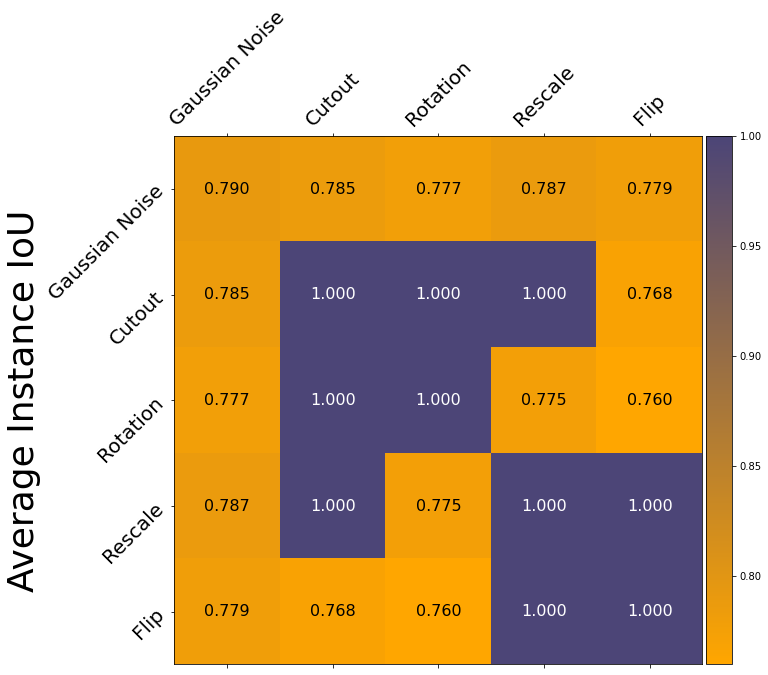

In [4]:

colors = [ '#ffa600', '#4C4577']
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

cmaps = [ 'viridis', 'plasma', 'inferno', 'magma', 'cividis']
fig, ax = plt.subplots(figsize=(10,10))
plot = ax.matshow(mat, cmap=cmap1)

    
for x, x_vals in enumerate(mat):
    for y, val in enumerate(x_vals):
        if val > 0.8:
            c = 'white'
        else:
            c = 'black'
        ax.text(x, y, "{:.3f}".format(val), va='center', ha='center', c=c, fontsize=16)

ax.set_xticklabels(['']+order, rotation=45)
ax.set_yticklabels(['']+order, rotation=45)

ax.tick_params(axis='both', labelsize=20)

from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

ax.set_title('', fontsize=30)
plt.colorbar(plot, cax=cax)
ax.set_ylabel('Average Instance IoU', fontsize=36)

plt.show()